# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data 

In [0]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

In [0]:
train.shape

(7352, 564)

## Obtain the  test data 

In [0]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

In [0]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [0]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [0]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

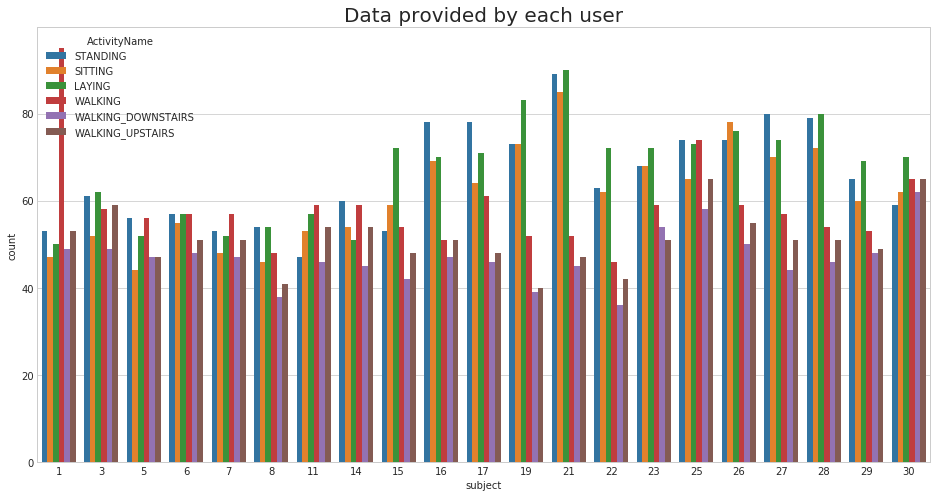

In [0]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

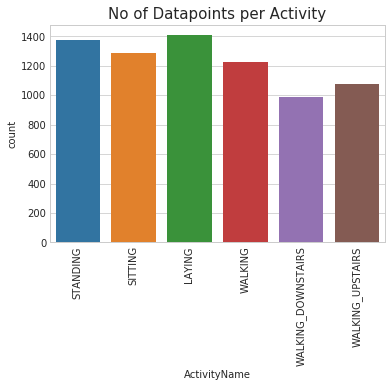

In [0]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [0]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [0]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

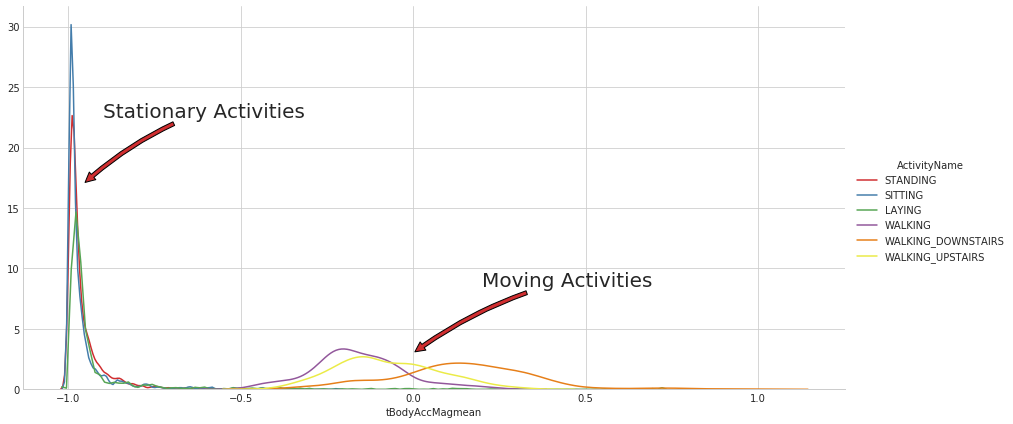

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

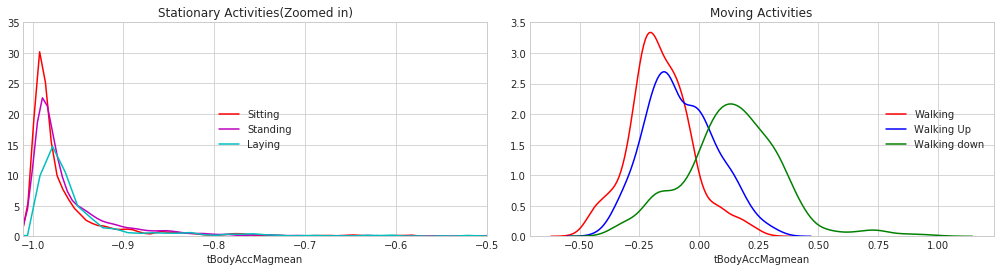

In [0]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

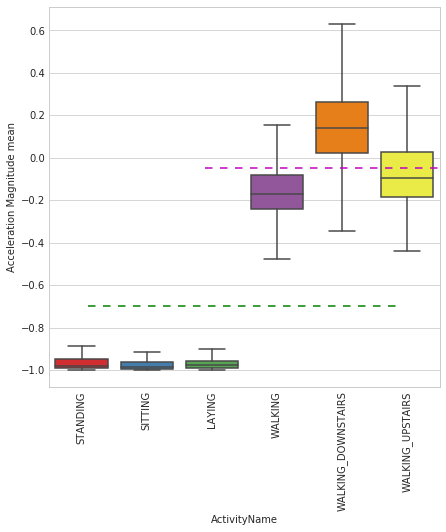

In [0]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

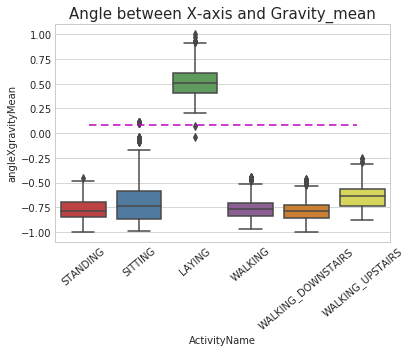

In [0]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

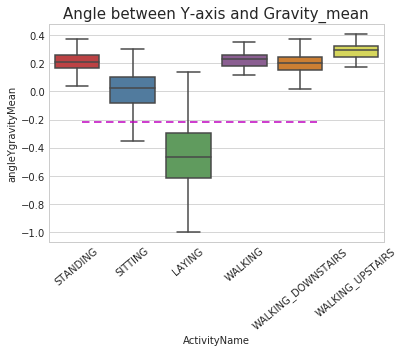

In [0]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.426s...
[t-SNE] Computed neighbors for 7352 samples in 72.001s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 124.8017578, gradient norm = 0.0253939 (50 iterations in 16.625s)
[t-SNE] Iteration 100: error = 107.2019501, gradient norm = 0.0284782 (50 iterations i

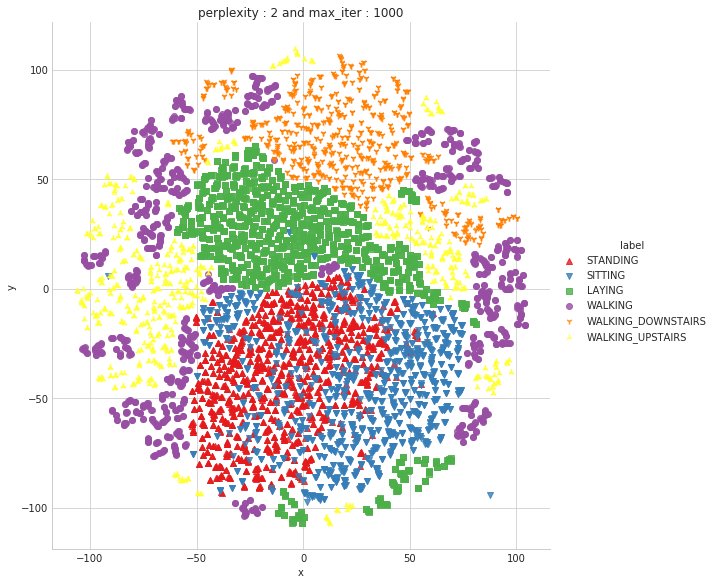

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.263s...
[t-SNE] Computed neighbors for 7352 samples in 48.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.122s
[t-SNE] Iteration 50: error = 114.1862640, gradient norm = 0.0184120 (50 iterations in 55.655s)
[t-SNE] Iteration 100: error = 97.6535568, gradient norm = 0.0174309 (50 iterati

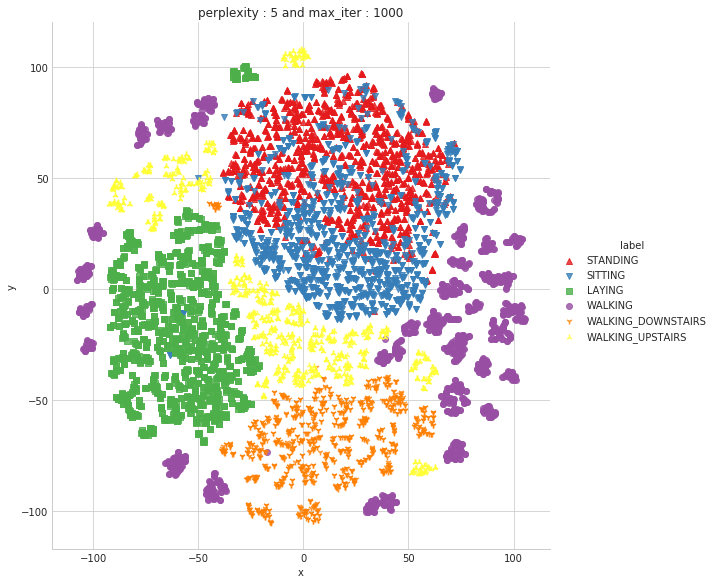

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.410s...
[t-SNE] Computed neighbors for 7352 samples in 64.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.214s
[t-SNE] Iteration 50: error = 106.0169220, gradient norm = 0.0194293 (50 iterations in 24.550s)
[t-SNE] Iteration 100: error = 90.3036194, gradient norm = 0.0097653 (50 iterat

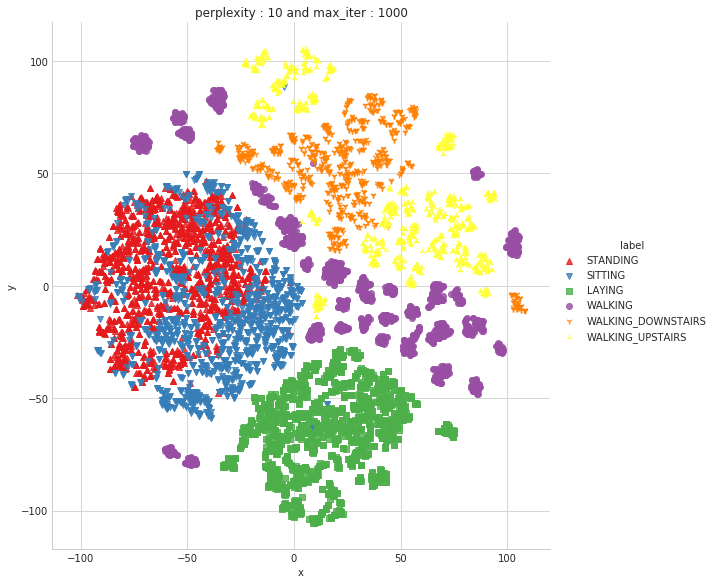

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.425s...
[t-SNE] Computed neighbors for 7352 samples in 61.792s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.355s
[t-SNE] Iteration 50: error = 97.5202179, gradient norm = 0.0223863 (50 iterations in 21.168s)
[t-SNE] Iteration 100: error = 83.9500732, gradient norm = 0.0059110 (50 iterati

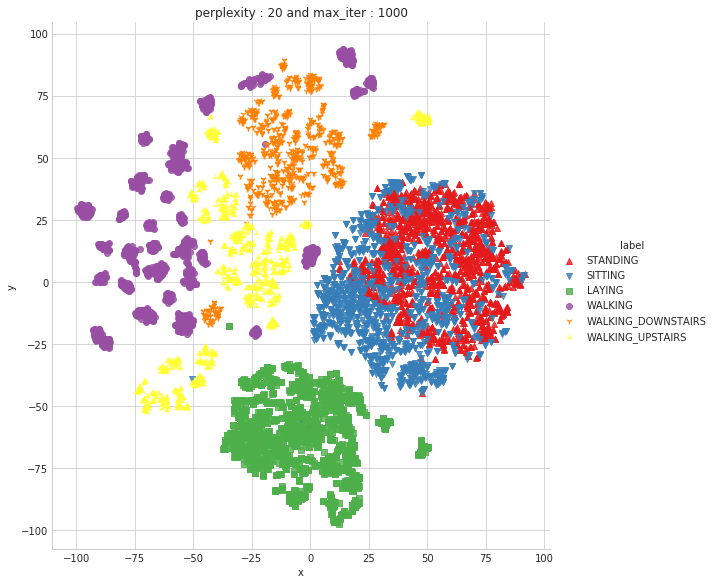

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.376s...
[t-SNE] Computed neighbors for 7352 samples in 73.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.844s
[t-SNE] Iteration 50: error = 86.1525574, gradient norm = 0.0242986 (50 iterations in 36.249s)
[t-SNE] Iteration 100: error = 75.9874649, gradient norm = 0.0061005 (50 iterat

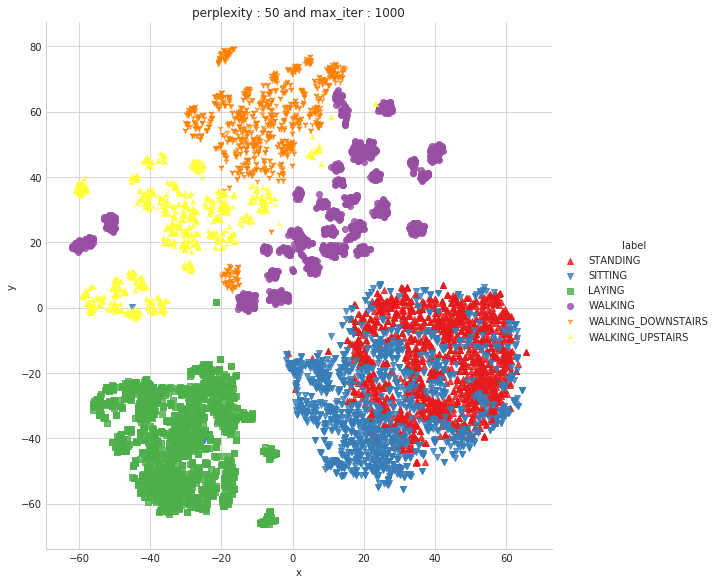

Done


In [0]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

## Obtain the train and test data

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [0]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [0]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [0]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [0]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [0]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [0]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:02:36.370041


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009320


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


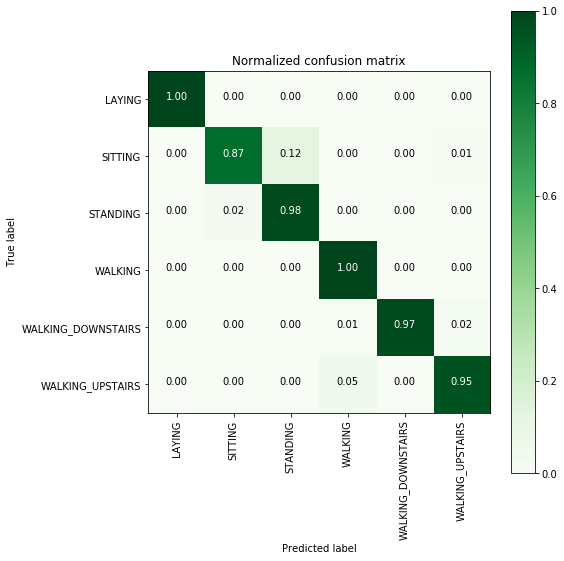

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [0]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


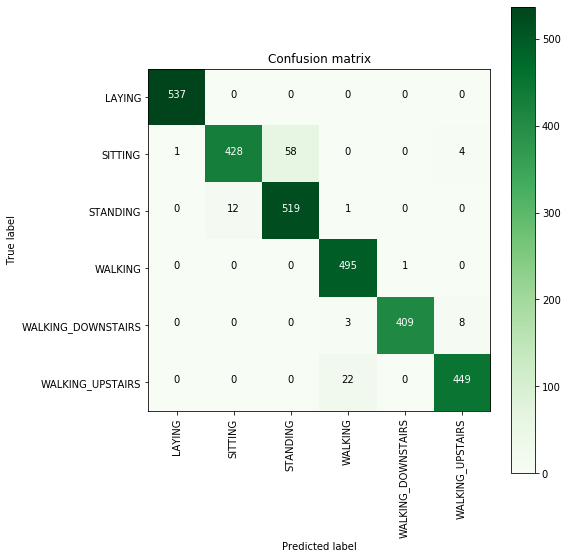

In [0]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [0]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.2min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:25.843810


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009192


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


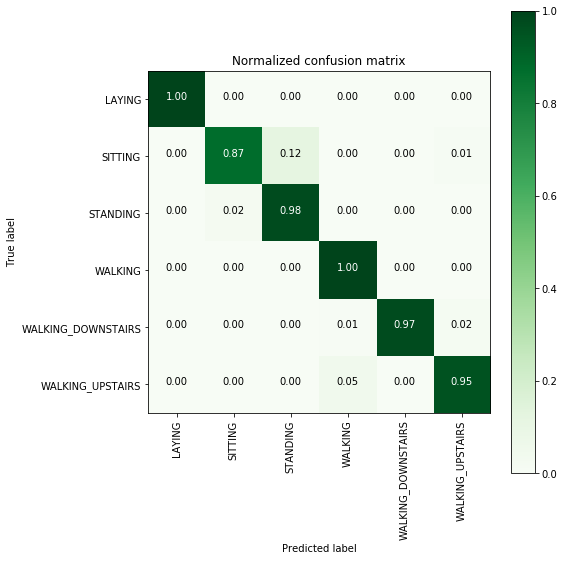

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [0]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


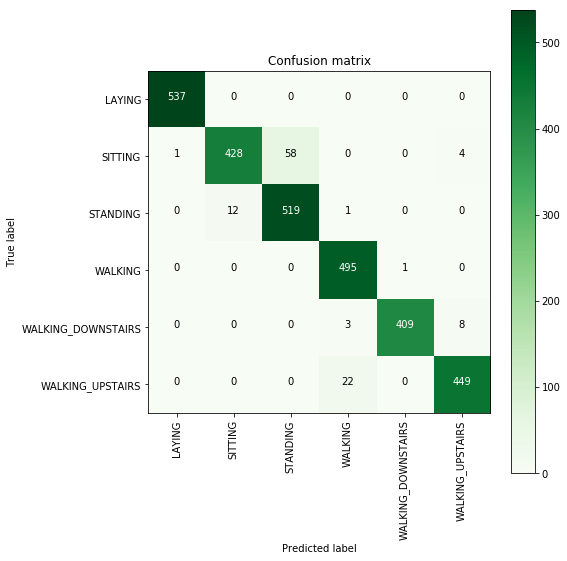

In [0]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [0]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



#  2. Linear SVC with GridSearch

In [0]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   24.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:32.951942


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012182


---------------------
|      Accuracy      |
---------------------

    0.9660671869697998


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 426  58   0   0   5]
 [  0  14 518   0   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  12   1 458]]


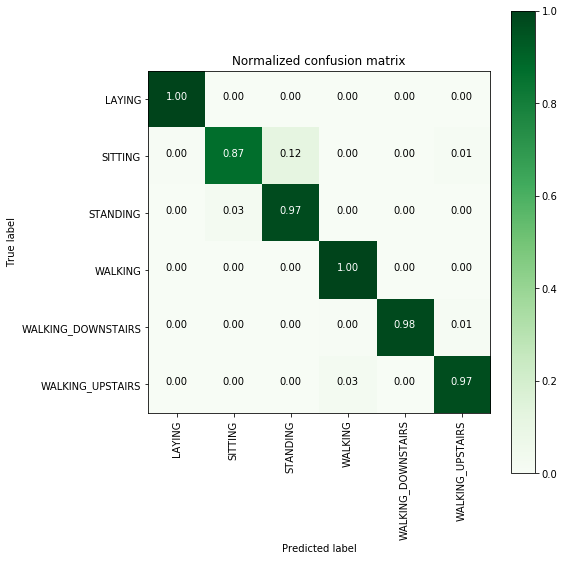

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.97      1.00      0.99       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

       avg / total       0.97      0.97      0.97      2947



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9465451577801959



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:05:46.182889


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:05.221285


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


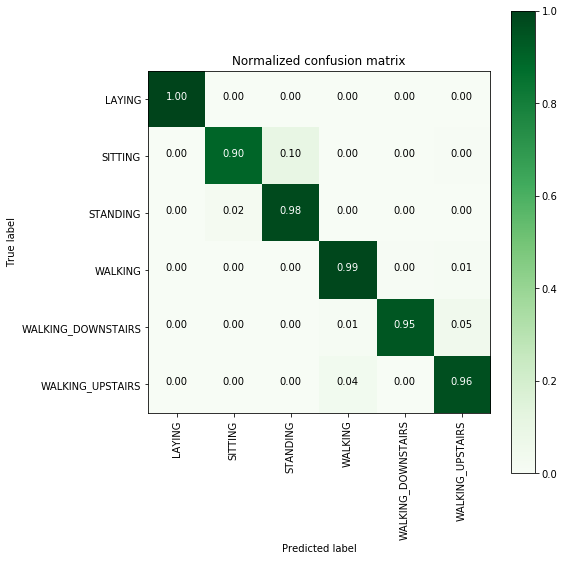

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [0]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:19.476858


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012858


---------------------
|      Accuracy      |
---------------------

    0.8642687478791992


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  15 344  61]
 [  0   0   0  73  29 369]]


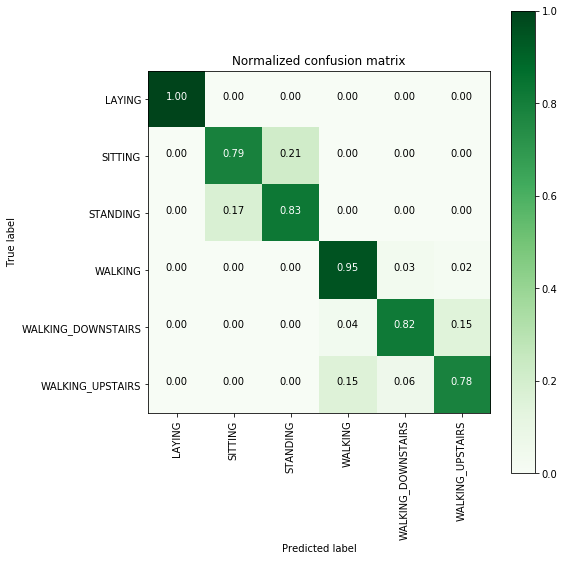

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------

In [0]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:22.775270


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.025937


---------------------
|      Accuracy      |
---------------------

    0.9131319986426875


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 427  64   0   0   0]
 [  0  52 480   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0  38 332  50]
 [  0   0   0  34   6 431]]


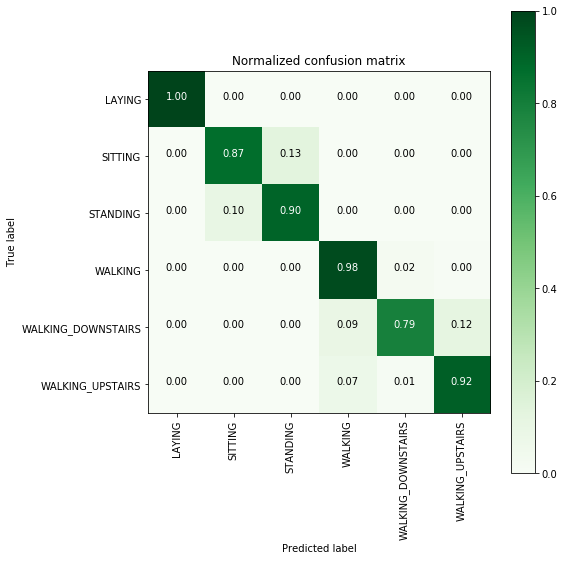

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.87      0.88       491
          STANDING       0.88      0.90      0.89       532
           WALKING       0.87      0.98      0.92       496
WALKING_DOWNSTAIRS       0.95      0.79      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

       avg / total       0.92      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False

In [0]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:28:03.653432


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.058843


---------------------
|      Accuracy      |
---------------------

    0.9222938581608415


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 396  93   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  31   6 433]]


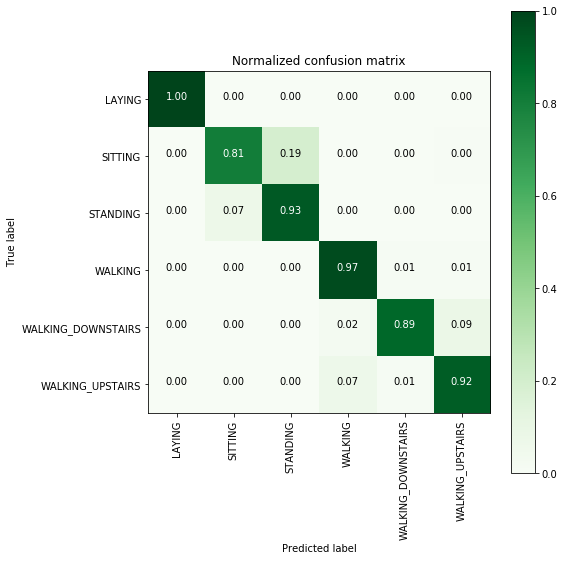

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])


# 7. Comparing all models

In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.61%       3.393% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.43%      13.57% 
Random Forest       : 91.31%      8.687% 
GradientBoosting DT : 91.31%      8.687% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

# Deep Learning Models

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [0]:
# Data directory
DATADIR = '/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/'

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [0]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [0]:
# Initializing parameters
epochs = 30
batch_size = 64

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [0]:
X_train.shape

(7352, 128, 9)

In [0]:
Y_train.shape

(7352, 6)

In [0]:
X_test.shape

(2947, 128, 9)

In [0]:
Y_test.shape

(2947, 6)

- Defining the Architecture of LSTM

In [0]:
# saving the best model
# https://machinelearningmastery.com/check-point-deep-learning-models-keras/
from keras.callbacks import ModelCheckpoint
filename="model1.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
# Stopping the training if model is not improving
#	https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [0]:
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 95s 13ms/step - loss: 1.1425 - acc: 0.5264 - val_loss: 0.8858 - val_acc: 0.6698

Epoch 00001: val_acc improved from -inf to 0.66983, saving model to model1.hdf5
Epoch 2/30
7352/7352 [==============================] - 93s 13ms/step - loss: 0.5963 - acc: 0.7641 - val_loss: 0

In [0]:
filename="model2.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 48)                11136     
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 294       
Total params: 11,430
Trainable params: 11,430
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 27s 4ms/step - loss: 1.2355 - acc: 0.4830 - val_loss: 1.1330 - val_acc: 0.5232

Epoch 00001: val_acc improved from -inf to 0.52324, saving model to model2.hdf5
Epoch 2/30
7352/7352 [==============================] - 25s 3ms/step - loss: 0.9328 - acc: 0.5955 - val_loss: 0

In [0]:
filename="model3.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.35))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 25s 3ms/step - loss: 1.2561 - acc: 0.4616 - val_loss: 1.1675 - val_acc: 0.5209

Epoch 00001: val_acc improved from -inf to 0.52087, saving model to model3.hdf5
Epoch 2/30
7352/7352 [==============================] - 25s 3ms/step - loss: 1.0313 - acc: 0.5600 - val_loss: 1

In [0]:
filename="model4.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model = Sequential()
model.add(LSTM(80, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 80)                28800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 486       
Total params: 29,286
Trainable params: 29,286
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 26s 4ms/step - loss: 1.2122 - acc: 0.4864 - val_loss: 1.1944 - val_acc: 0.4727

Epoch 00001: val_acc improved from -inf to 0.47268, saving model to model4.hdf5
Epoch 2/30
7352/7352 [==============================] - 24s 3ms/step - loss: 0.9656 - acc: 0.5971 - val_loss: 0

In [0]:
filename="model5.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model = Sequential()
model.add(LSTM(96, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.45))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 96)                40704     
_________________________________________________________________
dropout_6 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 582       
Total params: 41,286
Trainable params: 41,286
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 24s 3ms/step - loss: 1.2072 - acc: 0.4797 - val_loss: 1.1442 - val_acc: 0.5405

Epoch 00001: val_acc improved from -inf to 0.54055, saving model to model5.hdf5
Epoch 2/30
7352/7352 [==============================] - 24s 3ms/step - loss: 0.8495 - acc: 0.6496 - val_loss: 0

In [0]:
filename="model6.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               70656     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 71,430
Trainable params: 71,430
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 24s 3ms/step - loss: 1.1947 - acc: 0.4935 - val_loss: 1.0295 - val_acc: 0.5765

Epoch 00001: val_acc improved from -inf to 0.57652, saving model to model6.hdf5
Epoch 2/30
7352/7352 [==============================] - 22s 3ms/step - loss: 0.7876 - acc: 0.6801 - val_loss: 0

In [0]:
filename="model7.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, input_dim), return_sequences = True))
model.add(Dropout(0.7))
model.add(LSTM(64, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.7))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 128)          70656     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 120,454
Trainable params: 120,454
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 46s 6

In [0]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["No. of LSTM", "Dropout", "Test Accuracy"]

x.add_row(["32", 0.25 , 0.90465])
x.add_row(["48", 0.25 , 0.91619])
x.add_row(["64", 0.35 , 0.92263])
x.add_row(["80", 0.4 , 0.91788])
x.add_row(["96", 0.45 , 0.91788])
x.add_row(["128", 0.5 , 0.91754])
x.add_row(["128 and 64", 0.7 , 0.92734])
print(x)

+-------------+---------+---------------+
| No. of LSTM | Dropout | Test Accuracy |
+-------------+---------+---------------+
|      32     |   0.25  |    0.90465    |
|      48     |   0.25  |    0.91619    |
|      64     |   0.35  |    0.92263    |
|      80     |   0.4   |    0.91788    |
|      96     |   0.45  |    0.91788    |
|     128     |   0.5   |    0.91754    |
|  128 and 64 |   0.7   |    0.92734    |
+-------------+---------+---------------+


Obs : We have seen 92.734 % is the best test accuracy in these models. For higher accuracy we will apply Divide and Conquer technique.

# 1D CNN (Divide and Conquer Technique)
https://pdfs.semanticscholar.org/ddce/5ec101cfa6e86f033fccd979fdf16eea295c.pdf

In [0]:
ACTIVITIES = {0: 'Dynamic', 1: 'Static'}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 2,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 2 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    y[y<=3] = 0
    y[y>3] = 1
    return pd.get_dummies(y).as_matrix()

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [0]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [0]:
X_train.shape

(7352, 128, 9)

In [0]:
Y_train.shape

(7352, 2)

In [0]:
X_test.shape

(2947, 128, 9)

In [0]:
Y_test.shape

(2947, 2)

- Defining the Architecture of LSTM

In [0]:
# saving the best model
# https://machinelearningmastery.com/check-point-deep-learning-models-keras/
from keras.callbacks import ModelCheckpoint
filename="gdrive/My Drive/Colab Notebooks/model.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
# Stopping the training if model is not improving
#	https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

In [0]:
K.clear_session()
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, batch_size=64, validation_data=(X_test, Y_test), epochs=epochs, callbacks=[checkpoint, es])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 22s 3ms/step - loss: 0.4101 - acc: 0.8173 - val_loss: 0.2670 - val_acc: 0.8906

Epoch 00001: val_acc improved from -inf to 0.89057, saving model to gdrive/My Drive/Colab Notebooks/model.hdf5
Epoch 2/30
7352/7352 [==============================] - 22s 3ms/step - loss: 0.11

In [0]:
saved_model = tf.keras.models.load_model('gdrive/My Drive/Colab Notebooks/model.hdf5')

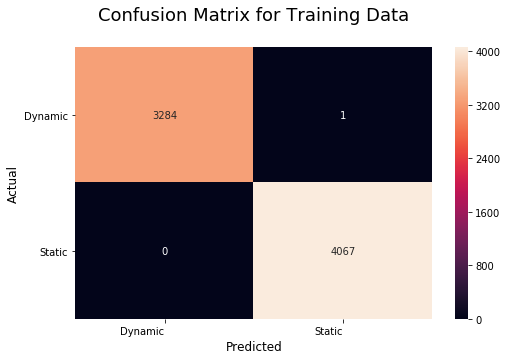

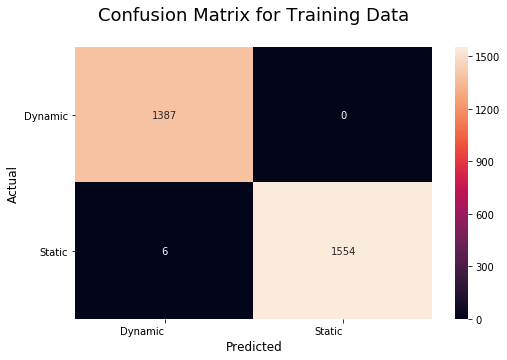

In [0]:
import matplotlib.pylab as plt
import seaborn as sns
c1=confusion_matrix(Y_train, saved_model.predict(X_train))
cm1 = pd.DataFrame(c1, index = ['Dynamic', 'Static' ],
                     columns = ['Dynamic', 'Static' ])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm1, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.title('Confusion Matrix for Training Data\n',size=18)
plt.show()

c2=confusion_matrix(Y_test, saved_model.predict(X_test))
cm2 = pd.DataFrame(c2, index = ['Dynamic', 'Static' ],
                     columns = ['Dynamic', 'Static' ])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm2, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.title('Confusion Matrix for Training Data\n',size=18)
plt.show()

In [0]:
score = saved_model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 4s 1ms/sample - loss: 0.0136 - acc: 0.9980


In [0]:
score

[0.013555412354538325, 0.997964]

Obj : Model is very good at classifying static and dynamic activities. For test data it's accuracy is 99.93%.

# Classification of Static Activities

In [0]:
ACTIVITIES = {0: 'SITTING', 1: 'STANDING', 2: 'LAYING'}

In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 3,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 3 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    y_s= y>3 
    y = y[y_s]
    return pd.get_dummies(y).values, y_s

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train_s, train_s_ind  = load_y('train') 
    y_test_s, test_s_ind = load_y('test')
    X_train_s = X_train[train_s_ind]
    X_test_s = X_test[test_s_ind]
    return X_train_s, X_test_s, y_train_s, y_test_s

In [0]:
# Loading the train and test data
X_train_s, X_test_s, Y_train_s, Y_test_s = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
X_train_s.shape

(4067, 128, 9)

In [0]:
X_test_s.shape

(1560, 128, 9)

In [0]:
Y_train_s.shape

(4067, 3)

In [0]:
Y_test_s.shape

(1560, 3)

In [0]:
filename="gdrive/My Drive/Colab Notebooks/model_s.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
K.clear_session()
model = Sequential()
model.add(Conv1D(128, 10, strides=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Conv1D(64, 10, strides=3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(50))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 128)           11648     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            81984     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [0]:
h_s=model.fit(X_train_s, Y_train_s, batch_size=32, validation_data=(X_test_s, Y_test_s), epochs=150, callbacks=[checkpoint])

Train on 4067 samples, validate on 1560 samples
Epoch 1/150
4067/4067 [==============================] - 2s 383us/step - loss: 0.0516 - acc: 0.8985 - val_loss: 0.0620 - val_acc: 0.8750

Epoch 00001: val_acc improved from -inf to 0.87500, saving model to gdrive/My Drive/Colab Notebooks/model_s.hdf5
Epoch 2/150
4067/4067 [==============================] - 1s 314us/step - loss: 0.0407 - acc: 0.9208 - val_loss: 0.0681 - val_acc: 0.8769

Epoch 00002: val_acc improved from 0.87500 to 0.87692, saving model to gdrive/My Drive/Colab Notebooks/model_s.hdf5
Epoch 3/150
4067/4067 [==============================] - 1s 319us/step - loss: 0.0407 - acc: 0.9228 - val_loss: 0.0572 - val_acc: 0.8821

Epoch 00003: val_acc improved from 0.87692 to 0.88205, saving model to gdrive/My Drive/Colab Notebooks/model_s.hdf5
Epoch 4/150
4067/4067 [==============================] - 1s 318us/step - loss: 0.0390 - acc: 0.9223 - val_loss: 0.0570 - val_acc: 0.8782

Epoch 00004: val_acc did not improve from 0.88205
Epoch

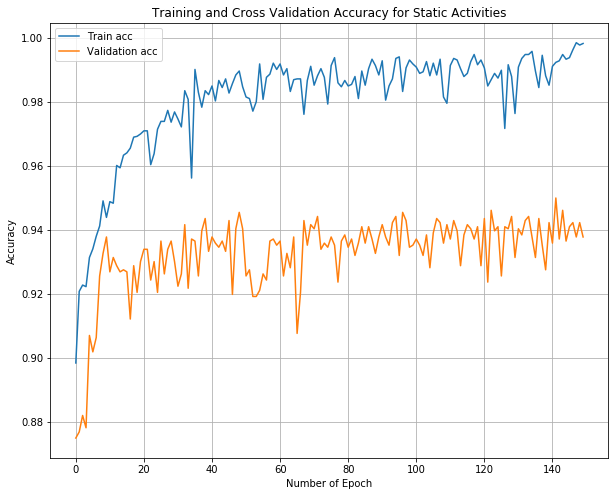

In [0]:
plt.figure(figsize=(10,8))
plt.plot(h_s.history['acc'],label='Train acc')
plt.plot(h_s.history['val_acc'],label = 'Validation acc')
plt.title('Training and Cross Validation Accuracy for Static Activities')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [0]:
saved_model_s = tf.keras.models.load_model(filename)

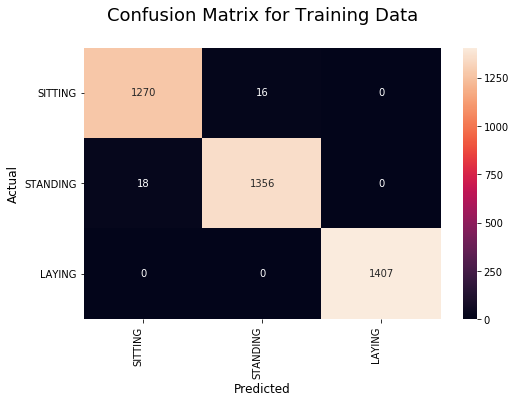

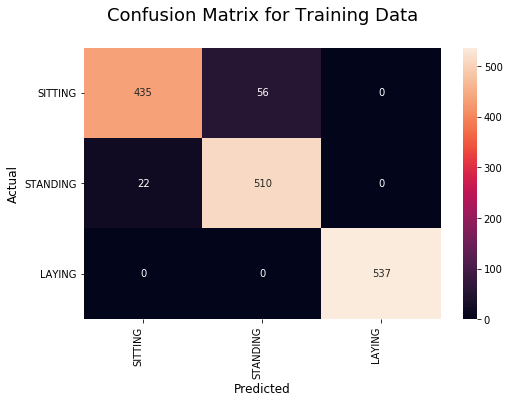

In [0]:
c1=confusion_matrix(Y_train_s, saved_model_s.predict(X_train_s))
cm1 = pd.DataFrame(c1, index = ['SITTING', 'STANDING', 'LAYING'],
                     columns = ['SITTING', 'STANDING', 'LAYING'])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm1, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=10)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.title('Confusion Matrix for Training Data\n',size=18)
plt.show()

c2=confusion_matrix(Y_test_s, saved_model_s.predict(X_test_s))
cm2 = pd.DataFrame(c2, index = ['SITTING', 'STANDING', 'LAYING'],
                     columns = ['SITTING', 'STANDING', 'LAYING'])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm2, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=10)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.title('Confusion Matrix for Training Data\n',size=18)
plt.show()

In [0]:
score = saved_model_s.evaluate(X_test_s, Y_test_s)

1560/1560 [==============================] - 0s 97us/sample - loss: 0.0320 - acc: 0.9500


In [0]:
score

[0.03197591994374129, 0.95]

## Classification of Dynamic Datapoints

In [0]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    
}


In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    y_d= y<=3 
    y = y[y_d]
    return pd.get_dummies(y).values, y_d

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train_d, train_d_ind  = load_y('train') 
    y_test_d, test_d_ind = load_y('test')
    X_train_d = X_train[train_d_ind]
    X_test_d = X_test[test_d_ind]
    return X_train_d, X_test_d, y_train_d, y_test_d

In [0]:
# Loading the train and test data
X_train_d, X_test_d, Y_train_d, Y_test_d = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
X_train_d.shape

(3285, 128, 9)

In [0]:
X_test_d.shape

(1387, 128, 9)

In [0]:
Y_train_d.shape

(3285, 3)

In [0]:
Y_test_d.shape

(1387, 3)

In [0]:
filename="gdrive/My Drive/Colab Notebooks/model_d.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
K.clear_session()
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 124, 128)          5888      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 120, 64)           41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               153700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [0]:
h_d = model.fit(X_train_d, Y_train_d, batch_size=batch_size, validation_data=(X_test_d, Y_test_d), epochs=150, callbacks=[checkpoint])

Train on 3285 samples, validate on 1387 samples
Epoch 1/150
3285/3285 [==============================] - 1s 456us/step - loss: 0.3249 - acc: 0.8642 - val_loss: 0.1888 - val_acc: 0.9344

Epoch 00001: val_acc improved from -inf to 0.93439, saving model to gdrive/My Drive/Colab Notebooks/model_d.hdf5
Epoch 2/150
3285/3285 [==============================] - 1s 347us/step - loss: 0.0241 - acc: 0.9939 - val_loss: 0.1491 - val_acc: 0.9394

Epoch 00002: val_acc improved from 0.93439 to 0.93944, saving model to gdrive/My Drive/Colab Notebooks/model_d.hdf5
Epoch 3/150
3285/3285 [==============================] - 1s 331us/step - loss: 0.0082 - acc: 0.9976 - val_loss: 0.1596 - val_acc: 0.9344

Epoch 00003: val_acc did not improve from 0.93944
Epoch 4/150
3285/3285 [==============================] - 1s 343us/step - loss: 0.0155 - acc: 0.9960 - val_loss: 0.0537 - val_acc: 0.9769

Epoch 00004: val_acc improved from 0.93944 to 0.97693, saving model to gdrive/My Drive/Colab Notebooks/model_d.hdf5
Epoch

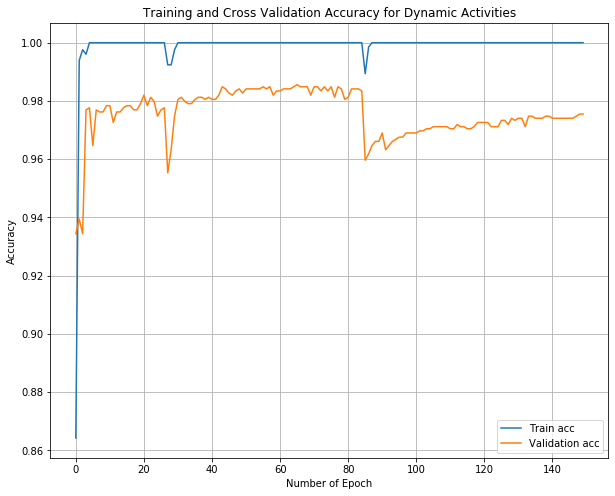

In [0]:
plt.figure(figsize=(10,8))
plt.plot(h_d.history['acc'],label='Train acc')
plt.plot(h_d.history['val_acc'],label = 'Validation acc')
plt.title('Training and Cross Validation Accuracy for Dynamic Activities')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [0]:
saved_model_d = tf.keras.models.load_model('gdrive/My Drive/Colab Notebooks/model_d.hdf5')

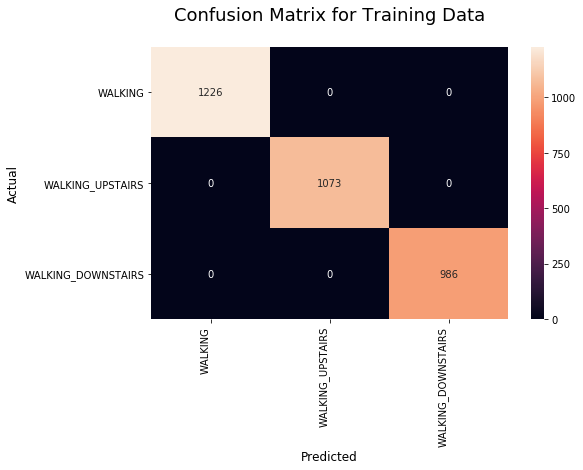

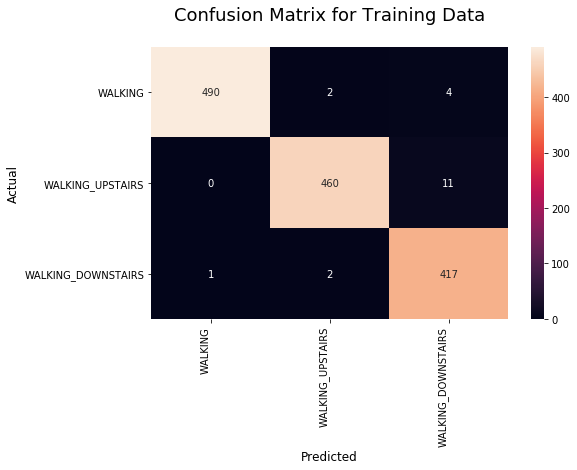

In [0]:
c1=confusion_matrix(Y_train_d, saved_model_d.predict(X_train_d))
cm1 = pd.DataFrame(c1, index = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS' ],
                     columns = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm1, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=10)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.title('Confusion Matrix for Training Data\n',size=18)
plt.show()

c2=confusion_matrix(Y_test_d, saved_model_d.predict(X_test_d))
cm2 = pd.DataFrame(c2, index = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'],
                     columns = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm2, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=10)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.title('Confusion Matrix for Training Data\n',size=18)
plt.show()

In [0]:
score = saved_model_d.evaluate(X_test_d, Y_test_d)

1387/1387 [==============================] - 0s 139us/sample - loss: 0.0694 - acc: 0.9856


In [0]:
score

[0.06943278757336872, 0.9855804]

# Predicting all Activities

In [0]:
ACTIVITIES = {0: 'WALKING', 1: 'WALKING_UPSTAIRS', 2: 'WALKING_DOWNSTAIRS',
              3: 'SITTING', 4: 'STANDING', 5: 'LAYING'}

In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 3,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 3 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/gdrive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    return y

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')
    return X_train, X_test, y_train, y_test

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
from keras.models import load_model
model = load_model('gdrive/My Drive/Colab Notebooks/model.hdf5')
model_d = load_model('gdrive/My Drive/Colab Notebooks/model_d.hdf5')
model_s = load_model('gdrive/My Drive/Colab Notebooks/model_s.hdf5')

In [0]:
def predict_activities(X):
    
    prediction = model.predict(X)
    pred_2class =  np.argmax(prediction, axis=1)
    
    
    X_d = X[pred_2class==0]
    prediction_d = model_d.predict(X_d)
    pred_d = np.argmax(prediction_d, axis=1)
    pred_d = pred_d + 1

    X_s = X[pred_2class==1]
    prediction_s = model_s.predict(X_s)
    pred_s = np.argmax(prediction_s, axis=1)
    pred_s = pred_s + 4
    
    
    i=0
    j=0 
    predicted_activity = []
    for pred in pred_2class:
        if pred == 1:
            predicted_activity.append(pred_s[i])
            i = i + 1
        else:
            predicted_activity.append(pred_d[j])
            j = j + 1 
    return predicted_activity

In [0]:
Y_pred_train = predict_activities(X_train)
Y_pred_test = predict_activities(X_test)

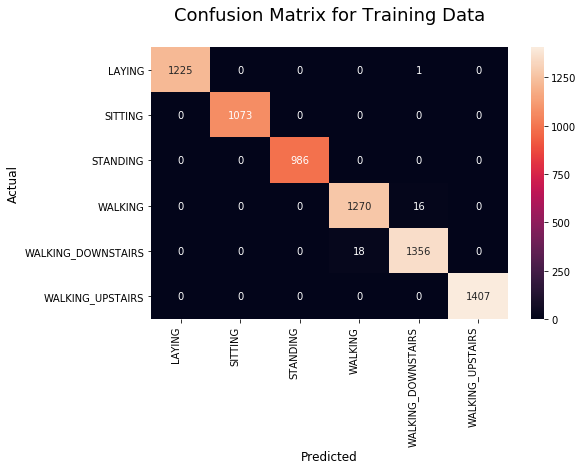

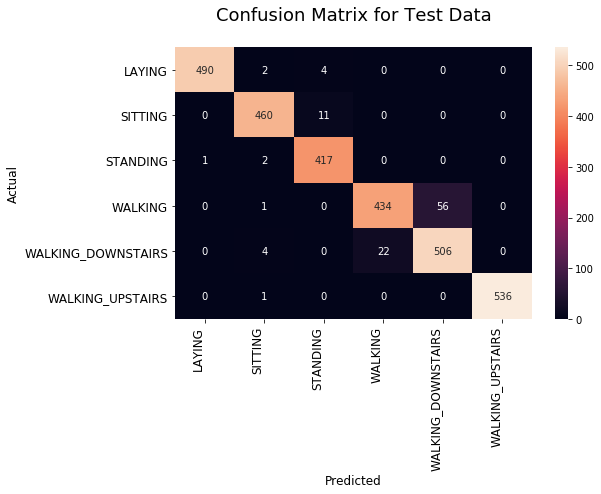

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
c1 = confusion_matrix(Y_train, final_pred_train)
cm1 = pd.DataFrame(c1, index = ['LAYING', 'SITTING', "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"],
                     columns = ['LAYING', 'SITTING', "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm1, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=10)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.title('Confusion Matrix for Training Data\n',size=18)

c2=confusion_matrix(Y_test, final_pred_val)
cm2 = pd.DataFrame(c2, index = ['LAYING', 'SITTING', "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"], 
                     columns = ['LAYING', 'SITTING', "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"])
plt.figure(figsize = (8,5))
a=sns.heatmap(cm2, annot=True, fmt='d')
a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=12)
plt.title('Confusion Matrix for Test Data\n',size=18)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.show()

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy of train data : ',accuracy_score(Y_train, Y_pred_train))
print('Accuracy of test data : ',accuracy_score(Y_test, Y_pred_test))

Accuracy of train data :  0.9952393906420022
Accuracy of test data :  0.9647098744485918


# Procedure

1. The data is taken from the UCI. The data has contain total of 10299 data points and 561 columns. It splitted into train and test in the ratio of 70:30. 
2. We cleaned the data. There is no duplicate in the data and the data is almost balanced. We did some analysis on static and dynamic activities and found that some features are very good at classifying these activities. We performed tsne at different perplexities and found that our data is almost seperable.
3. We built Logistic Regression, Linear SVC, RBF SVM Classifier, Decision Tree, Random Forest and Gradient Boosting DT models. We found that Logistic Regression, Linear SVC and RBF SVM Classifier are giving more than 96% accuracy.
4. We built LSTM model. We tried different number of LSTM and Dropout rate, we also added one extra layer of LSTM but maximum accuray we get is ~ 93%.
5. We used divide and conquer approach for 1D CNN. First we trained one LSTM model which were classifying static and dynamic activies almost accuractely. Next we built two CNN models for classify the activies of Static and Dynamic activities. We combined all these model and got an accutacy of 96.47%.